In [6]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
GL1=pd.read_csv('datasets/regional-global-weekly-2018-01-12--2018-01-19.csv', header=1)
US1=pd.read_csv('datasets/regional-us-weekly-2018-01-12--2018-01-19.csv', header=1)
GB1=pd.read_csv('datasets/regional-gb-weekly-2018-01-12--2018-01-19.csv', header=1)

GL1.head()

,Position,Track Name,Artist,Streams,URL
0,1,Havana (feat. Young Thug),Camila Cabello,30948101,https://open.spotify.com/track/1rfofaqEpACxVEH...
1,2,rockstar,Post Malone,27643632,https://open.spotify.com/track/7wGoVu4Dady5GV0...
2,3,River (feat. Ed Sheeran),Eminem,22610091,https://open.spotify.com/track/5UEnHoDYpsxlfzW...
3,4,Never Be the Same,Camila Cabello,22147865,https://open.spotify.com/track/4eWQlBRaTjPPUlz...
4,5,Finesse - Remix; feat. Cardi B,Bruno Mars,20387864,https://open.spotify.com/track/3Vo4wInECJQuz9B...


In [63]:
GL1=GL1.drop(['URL','Position'], axis=1)
US1=US1.drop(['URL','Position'], axis=1)
GB1=GB1.drop(['URL','Position'], axis=1)

GB1.head()

,Track Name,Artist,Streams
0,River (feat. Ed Sheeran),Eminem,2872484
1,Barking,Ramz,2838368
2,Havana (feat. Young Thug),Camila Cabello,2184610
3,rockstar,Post Malone,2043883
4,Never Be the Same,Camila Cabello,2010466


In [64]:
totalGL = GL1['Streams'].sum()
totalUS = US1['Streams'].sum()
totalGB = GB1['Streams'].sum()

print(totalGL)
print(totalUS)
print(totalGB)

1510938244
503339880
134488545


In [65]:
GL1['Impact GL%'] = round(GL1['Streams']/totalGL*100, 2)
US1['Impact US%'] = round(US1['Streams']/totalUS*100, 2)
GB1['Impact GB%'] = round(GB1['Streams']/totalGB*100, 2)

GL1.head()

,Track Name,Artist,Streams,Impact GL%
0,Havana (feat. Young Thug),Camila Cabello,30948101,2.05
1,rockstar,Post Malone,27643632,1.83
2,River (feat. Ed Sheeran),Eminem,22610091,1.50
3,Never Be the Same,Camila Cabello,22147865,1.47
4,Finesse - Remix; feat. Cardi B,Bruno Mars,20387864,1.35


In [66]:
USA_UK = pd.merge(GB1, US1, on='Track Name')
TOTAL = pd.merge(USA_UK, GL1, on='Track Name')
T = TOTAL.sort_values(by='Impact GL%', ascending=False)


In [81]:
# get number of songs per author

# global
GL1_count = GL1.groupby("Artist", as_index=False).agg({"Track Name":"count"})
GL1_count.sort_values(by=["Track Name"], ascending=False, inplace=True)

# usa
US1_count = US1.groupby("Artist", as_index=False).agg({"Track Name":"count"})
US1_count.sort_values(by=["Track Name"], ascending=False, inplace=True)

# uk
GB1_count = GB1.groupby("Artist", as_index=False).agg({"Track Name":"count"})
GB1_count.sort_values(by=["Track Name"], ascending=False, inplace=True)

In [85]:
GB1_count

,Artist,Track Name
18,Camila Cabello,11
34,Ed Sheeran,10
93,Post Malone,6
49,J Hus,4
46,Hugh Jackman,4
...,...,...
43,Giggs,1
42,GRM Daily,1
40,Future,1
39,Fuse ODG,1


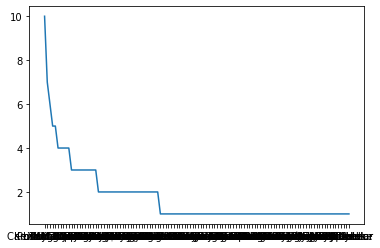

In [80]:
#plot UK/US song per artist distribution
#plt.plot(GB1_count["Artist"], GB1_count["Track Name"])
plt.plot(US1_count["Artist"], US1_count["Track Name"])
plt.show()

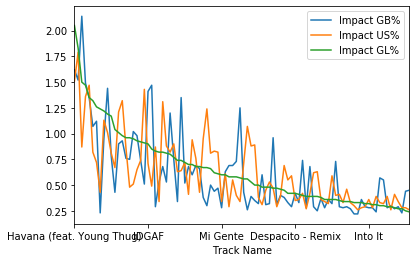

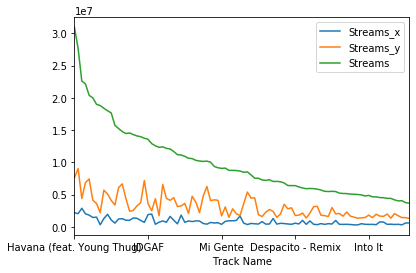

In [36]:
Impact=T.plot(x="Track Name", y=["Impact GB%", "Impact US%",'Impact GL%'])
Streams=T.plot(x="Track Name", y=["Streams_x", "Streams_y",'Streams'])

In [142]:
# Divide the table in uk, us, gl
GL=GL1.head(51)
US=US1.head(51)
UK=GB1.head(51)

# Per table: Order the table per stream, take only the first 50 positions 
# Count how many songs per author
songs=GL.groupby('Artist').count()
GLL=GL=songs.drop(['Streams','Impact GL%'], axis=1)
GLL=GL.columns= ["Number songs"]
GLL=GL.sort_values(by='Number songs',ascending=False)
# Plot how many songs per author
GL=GL1.head(51)
GLL

,Number songs
Artist,
Post Malone,4
Camila Cabello,3
Ed Sheeran,3
Kendrick Lamar,2
Dua Lipa,2
G-Eazy,2
Piso 21,1
Marshmello,1
Martin Garrix,1


In [1]:

Merge= pd.merge(GLL, GL, on='Artist')
M=Merge.head(11)

NameError: name 'pd' is not defined

In [159]:
M

,Artist,Number songs,Track Name,Streams,Impact GL%
0,Post Malone,4,rockstar,27643632,1.83
1,Post Malone,4,I Fall Apart,14771304,0.98
2,Post Malone,4,Candy Paint,10139620,0.67
3,Post Malone,4,Congratulations,10024863,0.66
4,Camila Cabello,3,Havana (feat. Young Thug),30948101,2.05
5,Camila Cabello,3,Never Be the Same,22147865,1.47
6,Camila Cabello,3,Real Friends,10930220,0.72
7,Ed Sheeran,3,Perfect,17656931,1.17
8,Ed Sheeran,3,Shape of You,14554752,0.96
9,Ed Sheeran,3,Perfect Duet (Ed Sheeran & Beyoncé),14299195,0.95
